# Problem Statement:

The goal of this project is to develop a machine learning model that can accurately classify iris flowers into one of three species (Setosa, Versicolor, or Virginica) based on four features: sepal length, sepal width, petal length, and petal width. This classification task is a common example in pattern recognition and machine learning.

# About

In [1]:
import cv2
import matplotlib.pyplot as plt

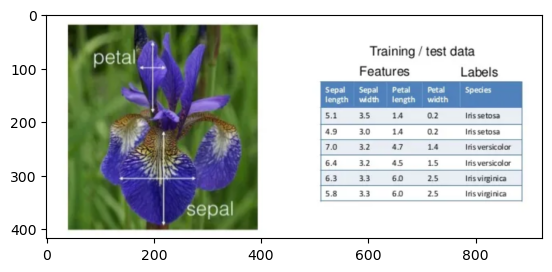

In [2]:
img=cv2.imread('Screenshot 2024-07-16 142038.png')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Import libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Data preprocessing 

In [2]:
data=pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Null value treatment

In [4]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Converting categorical data into numeric data

In [6]:
numerics=LabelEncoder()
data['target']=numerics.fit_transform(data['Species'])

In [7]:
data.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [8]:
data[data.target==0].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [9]:
data[data.target==1].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
50,51,7.0,3.2,4.7,1.4,Iris-versicolor,1
51,52,6.4,3.2,4.5,1.5,Iris-versicolor,1
52,53,6.9,3.1,4.9,1.5,Iris-versicolor,1
53,54,5.5,2.3,4.0,1.3,Iris-versicolor,1
54,55,6.5,2.8,4.6,1.5,Iris-versicolor,1


In [10]:
data[data.target==2].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
100,101,6.3,3.3,6.0,2.5,Iris-virginica,2
101,102,5.8,2.7,5.1,1.9,Iris-virginica,2
102,103,7.1,3.0,5.9,2.1,Iris-virginica,2
103,104,6.3,2.9,5.6,1.8,Iris-virginica,2
104,105,6.5,3.0,5.8,2.2,Iris-virginica,2


here 0 = Iris-setosa, 1 = Iris-versicolor, 2 = Iris-virginica

In [11]:
df0=data[:50]
df1=data[50:100]
df2=data[100:]

In [12]:
import matplotlib.pyplot as plt
#%matplotlib inline

classification on sepal

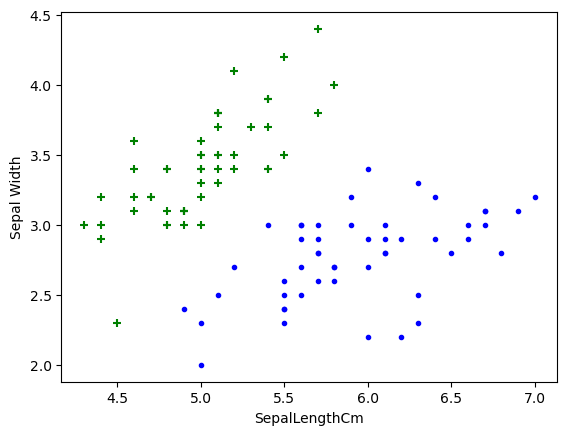

In [13]:
plt.xlabel('SepalLengthCm')
plt.ylabel('Sepal Width')
plt.scatter(df0['SepalLengthCm'], df0['SepalWidthCm'],color="green",marker='+')
plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'],color="blue",marker='.')

classification on petal

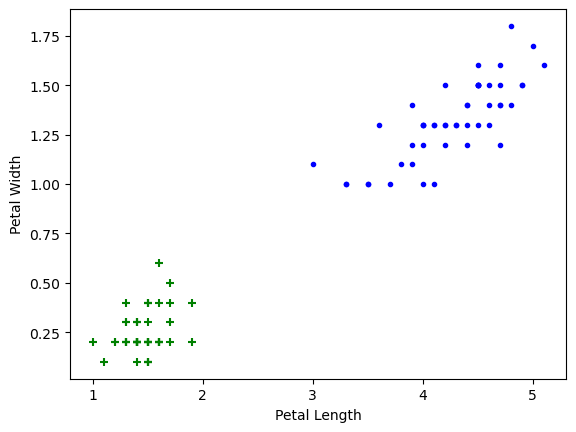

In [14]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['PetalLengthCm'], df0['PetalWidthCm'],color="green",marker='+')
plt.scatter(df1['PetalLengthCm'], df1['PetalWidthCm'],color="blue",marker='.')

In [15]:
x=data.drop(['Species','target','Id'],axis=1)
#x=x.values
y=data['target']

# spliting data

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
print(x_train.shape)
x_test.shape

(120, 4)


(30, 4)

# Model fit

In [18]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf= RandomForestClassifier(n_estimators =10, random_state = 5)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=5)

# accurecy score

In [23]:
knn.score(x_train,y_train)

0.975

In [24]:
nb.score(x_train,y_train)

0.95

In [25]:
rf.score(x_train,y_train)

0.9916666666666667

In [26]:
data = {
    'Category': ['KNeighborsClassifier', 'GaussianNB', 'RandomForestClassifier'],
    'Values': [97, 95, 99]
}
df = pd.DataFrame(data)
print(df)

                 Category  Values
0    KNeighborsClassifier      97
1              GaussianNB      95
2  RandomForestClassifier      99


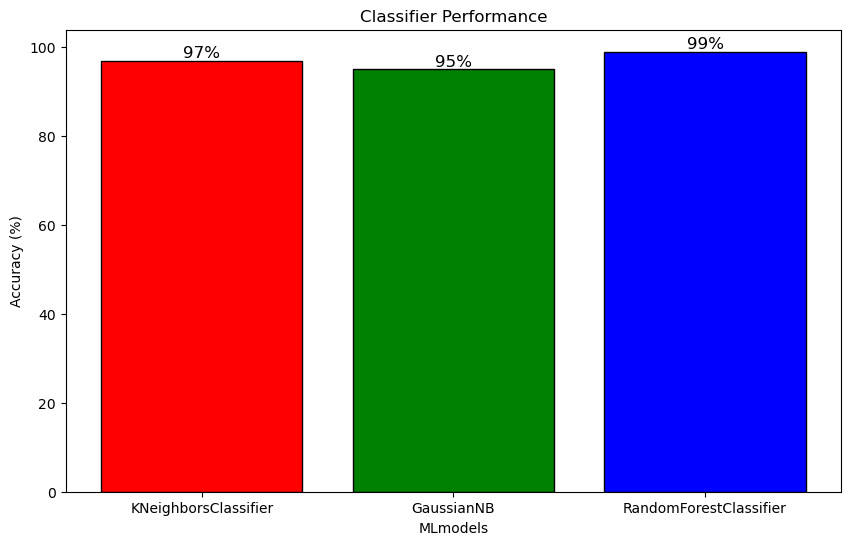

In [27]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Category'], df['Values'], color=['red', 'green', 'blue'], edgecolor='black')
plt.title('Classifier Performance')
plt.xlabel('MLmodels')
plt.ylabel('Accuracy (%)')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}%', ha='center', va='bottom', fontsize=12, color='black')
plt.show()

# prediction

In [28]:
rf.predict([[7.0,3.2,4.7,1.4]])

C:\Users\91886\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

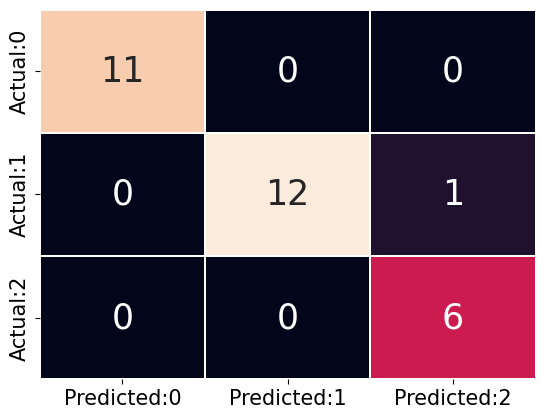

In [29]:
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])
sns.heatmap(conf_matrix, annot = True,cbar = False, linewidths = 0.1,
            annot_kws = {'size':25})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

Here we can see that there is only one miss prediction 

that Iris-versicolor wrongly predicted as Iris-virginica 

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [31]:
from tkinter import  *
from tkinter import messagebox

In [32]:
root = Tk()

root.title("Flower Predictor")

root.geometry("1000x500")


root.config(bg="lightblue")

header = Label(root,text="Iris Flower Predictor",bg="lightblue",
     foreground="black",font=("Arial",15,"bold"))
header.pack(padx=40, pady=40)

frame1= Frame(root,bg="lightblue")
frame1.pack()

label1 = Label(frame1,text="Sepal Length",bg="lightblue",foreground="black",
     font=("Arial",15,"bold"))
label1.grid(row=0,column=0,pady=10)

entry1=Entry(frame1,width=10,font=("Arial",15,"bold"),bg="gray",fg="white",
     borderwidth=3)
entry1.grid(row=0,column=1,pady=10)
#########################################################
label2 = Label(frame1,text="Sepal Width",bg="lightblue",foreground="black",
     font=("Arial",15,"bold"))
label2.grid(row=0,column=3,pady=10)

entry2=Entry(frame1,width=10,font=("Arial",15,"bold"),bg="gray",fg="white",
     borderwidth=3)
entry2.grid(row=0,column=4,pady=10)

################################################################
label3 = Label(frame1,text="petal Length",bg="lightblue",foreground="black",
     font=("Arial",15,"bold"))
label3.grid(row=1,column=0,pady=10)

entry3=Entry(frame1,width=10,font=("Arial",15,"bold"),bg="gray",fg="white",
     borderwidth=3)
entry3.grid(row=1,column=1,pady=10)
#########################################################
label4 = Label(frame1,text="petal Width",bg="lightblue",foreground="black",
     font=("Arial",15,"bold"))
label4.grid(row=1,column=3,pady=10)

entry4=Entry(frame1,width=10,font=("Arial",15,"bold"),bg="gray",fg="white",
     borderwidth=3)
entry4.grid(row=1,column=4,pady=10)
###############################################################
species_label=Label(root,text="",bg="lightblue",font=("Arial",15,"bold"))
species_label.pack()


def predict_species():
    sepal_length = float(entry1.get())
    sepal_width = float(entry2.get())
    petal_length = float(entry3.get())
    petal_width = float(entry4.get())
    
    pred=rf.predict([[sepal_length,sepal_width,petal_length,petal_width]])    
    if pred==0:
        z='Iris-setosa'
    elif pred==1:
        z='Iris-versicolor'
    else:
        z='Iris-virginica'
    species_label.config(text="Predicted Species: "+z)

button = Button(text="Predict Species",bg="green",activebackground="blue",
      borderwidth=7,font=("Arial",15,"bold"),command=predict_species)
button.pack(padx=10,pady=8)
def clear_entries():
    entry1.delete(0, END)
    entry2.delete(0, END)
    entry3.delete(0, END)
    entry4.delete(0, END)
clear_button = Button(text="Clear Entries",activebackground="red",font=("Arial",10,"bold"),command=clear_entries)
clear_button.pack(padx=10,pady=20)
root.mainloop()

C:\Users\91886\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Project Description:

In this project, the Iris dataset was utilized to develop and compare the performance of three different machine learning models for classifying iris species: K-Nearest Neighbors (KNN), Naive Bayes (GaussianNB), and Random Forest Classifier.

The dataset was first preprocessed, including encoding the target variable, and split into training and testing sets. Each model was then trained on the training data and evaluated on the test data. The accuracy of each model was measured, and the Random Forest Classifier showed the highest accuracy, followed by KNN and GaussianNB.

To visualize the performance, a bar chart was created, showcasing the accuracy of each model. Finally, a confusion matrix was generated for the best-performing model to analyze the classification results in detail. The project concluded with a classification report summarizing the precision, recall, and F1-score of the models.